# Data Visualuation sur l'enquête réalisée par l'association vélos en selle en 2019 concernant le service vélib'

In [ ]:
import pandas as pd
import requests
import json
#pour l'exploitation des kpis si besoin:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_velo= pd.read_excel("OPEN-DATA-étude-Vélib-Paris-en-Selle.xlsx")

In [ ]:
df_velo

,Echantillon ou pas,Timestamp,Type de Vélib' utilisé pour le trajet :,Est-ce que votre trajet s'est bien passé ?,Accéder à la version longue du questionnaire,Commentaire libre (facultatif) :,Problème sur la prise du Vélib' (je n'ai pas réussi à prendre un vélo du premier coup) :,Sur la prise du Vélib' (facultatif) :,Nombre de Vélib' essayés (facultatif) :,Nombre de stations essayées (facultatif) :,Problème sur le Vélib' lui-même :,Sur le Vélib' lui-même (facultatif) :,Avez vous pu réaliser le trajet en une seule fois ? (facultatif),Problème sur le dépôt du Vélib' (je n'ai pas réussi à déposer mon vélo du premier coup) :,Sur le dépôt du Vélib' (facultatif) :,Zone de départ (facultatif) :,Numéro de station de départ (facultatif) :,Zone d'arrivée (facultatif) :,Numéro de station d'arrivée (facultatif) :,Commentaire libre (facultatif)
0,Echantillon,2019-01-07 00:20:47,Vélib' mécanique mais je voulais un Vélib' éle...,"Non, ce n'était pas satisfaisant",Oui,NaN,Non,NaN,NaN,NaN,Oui,Pneu dégonflé / problème de roue,"Non, j'ai du changer de vélo en cours de parcours",Non,NaN,Paris - arrondissements centraux (1 à 11),7007.0,Paris - arrondissements périphériques (12 à 20),13035.0,"1er vélo électrique problème de roue, le 2ème ..."
1,Echantillon,2019-01-07 04:57:55,Vélib' mécanique,"Oui globalement, avec des problèmes mineurs",Oui,NaN,Oui,Velib' qui s'avère non fonctionnel une fois dé...,2.0,1,Non,NaN,NaN,Non,NaN,Paris - arrondissements périphériques (12 à 20),12011.0,Paris - arrondissements périphériques (12 à 20),NaN,Premier velib ne se débloqué pas de la borne a...
2,Echantillon,2019-01-07 05:57:03,Vélib' électrique (VAE),"Oui globalement, avec des problèmes mineurs",Oui,NaN,Non,NaN,NaN,NaN,Oui,Problème sur les vitesses / chaîne / pédalier,"Oui, j'ai gardé le même vélo du début à la fin",Non,NaN,Paris - arrondissements centraux (1 à 11),NaN,Paris - arrondissements périphériques (12 à 20),NaN,"Pb de roulement, frein?"
3,Echantillon,2019-01-07 07:12:11,Vélib' mécanique,"Oui globalement, avec des problèmes mineurs",Oui,NaN,Oui,Velib' indisponible (picto 1),2.0,1,Non,NaN,NaN,Non,NaN,Paris - arrondissements périphériques (12 à 20),14128.0,Paris - arrondissements centraux (1 à 11),10028.0,NaN
4,Echantillon,2019-01-07 08:45:23,Vélib' mécanique,"Oui globalement, avec des problèmes mineurs",Non,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Echantillon,7/31/2019 9:19:35,Vélib' mécanique,"Oui, du début à la fin",Oui,NaN,Non,NaN,NaN,NaN,Non,NaN,NaN,Non,NaN,Paris - arrondissements périphériques (12 à 20),NaN,Paris - arrondissements centraux (1 à 11),NaN,NaN
1901,Echantillon,7/31/2019 9:40:31,Aucun vélo (j'ai renoncé au trajet),J'ai renoncé au trajet,Non,"Station vélo près rue Bréguet: 9 vélos, 9 cass...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,Echantillon,7/31/2019 9:41:13,Aucun vélo (j'ai renoncé au trajet),J'ai renoncé au trajet,Non,Station rue Keller ce matin: 3 vélos en tout e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,Echantillon,7/31/2019 9:43:32,Aucun vélo (j'ai renoncé au trajet),J'ai renoncé au trajet,Non,"Station rue de la roquette ce matin: 2 vélos, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_velo.columns


Index(['Echantillon ou pas', 'Timestamp',
       'Type de Vélib' utilisé pour le trajet :',
       'Est-ce que votre trajet s'est bien passé ?',
       'Accéder à la version longue du questionnaire',
       'Commentaire libre (facultatif) :',
       'Problème sur la prise du Vélib' (je n'ai pas réussi à prendre un vélo du premier coup) :',
       'Sur la prise du Vélib' (facultatif) :',
       'Nombre de Vélib' essayés (facultatif) :',
       'Nombre de stations essayées (facultatif) :',
       'Problème sur le Vélib' lui-même :',
       'Sur le Vélib' lui-même (facultatif) :',
       'Avez vous pu réaliser le trajet en une seule fois ? (facultatif)',
       'Problème sur le dépôt du Vélib' (je n'ai pas réussi à déposer mon vélo du premier coup) :',
       'Sur le dépôt du Vélib' (facultatif) :',
       'Zone de départ (facultatif) :',
       'Numéro de station de départ (facultatif) :',
       'Zone d'arrivée (facultatif) :',
       'Numéro de station d'arrivée (facultatif) :',
      

In [ ]:
df_velo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 20 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Echantillon ou pas                                                                         1905 non-null   object 
 1   Timestamp                                                                                  1905 non-null   object 
 2   Type de Vélib' utilisé pour le trajet :                                                    1905 non-null   object 
 3   Est-ce que votre trajet s'est bien passé ?                                                 1905 non-null   object 
 4   Accéder à la version longue du questionnaire                                               1905 non-null   object 
 5   Commentaire libre (facultatif) :                

In [ ]:
df_velo["Accéder à la version longue du questionnaire"].value_counts()

Oui    1226
Non     679
Name: Accéder à la version longue du questionnaire, dtype: int64

In [ ]:
df_velo["Est-ce que votre trajet s'est bien passé ?"].value_counts()

Vélib' mécanique                                               555
Vélib' électrique (VAE)                                        451
Oui, du début à la fin                                         311
Oui globalement, avec des problèmes mineurs                    183
Non, ce n'était pas satisfaisant                               107
Aucun vélo (j'ai renoncé au trajet)                            104
J'ai renoncé au trajet                                          80
Vélib' mécanique mais je voulais un Vélib' électrique (VAE)     74
Velib' électrique (VAE) mais je voulais un Vélib' mécanique     40
Name: Est-ce que votre trajet s'est bien passé ?, dtype: int64

In [ ]:
df_velo["Echantillon ou pas"].value_counts()

Echantillon         1581
Hors échantillon     324
Name: Echantillon ou pas, dtype: int64

In [ ]:
df_velo[df_velo["Est-ce que votre trajet s'est bien passé ?"]=="Vélib' mécanique"]

,Echantillon ou pas,Timestamp,Type de Vélib' utilisé pour le trajet :,Est-ce que votre trajet s'est bien passé ?,Accéder à la version longue du questionnaire,Commentaire libre (facultatif) :,Problème sur la prise du Vélib' (je n'ai pas réussi à prendre un vélo du premier coup) :,Sur la prise du Vélib' (facultatif) :,Nombre de Vélib' essayés (facultatif) :,Nombre de stations essayées (facultatif) :,Problème sur le Vélib' lui-même :,Sur le Vélib' lui-même (facultatif) :,Avez vous pu réaliser le trajet en une seule fois ? (facultatif),Problème sur le dépôt du Vélib' (je n'ai pas réussi à déposer mon vélo du premier coup) :,Sur le dépôt du Vélib' (facultatif) :,Zone de départ (facultatif) :,Numéro de station de départ (facultatif) :,Zone d'arrivée (facultatif) :,Numéro de station d'arrivée (facultatif) :,Commentaire libre (facultatif)
302,Hors échantillon,2019/07/31 7:37:03 pm EET,"Oui, du début à la fin",Vélib' mécanique,Oui,NaN,Non,NaN,NaN,NaN,Oui,Problème sur les vitesses / chaïne / pédalier,"Oui, j'ai gardé le même vélo du début à la fin",Non,NaN,Paris - arrondissements centraux (1 à 11),NaN,Paris - arrondissements centraux (1 à 11),NaN,NaN
303,Echantillon,2019/07/31 9:50:16 pm EET,"Oui globalement, avec des problèmes mineurs",Vélib' mécanique,Oui,NaN,Non,NaN,NaN,NaN,Oui,Problème sur les vitesses / chaïne / pédalier,"Oui, j'ai gardé le même vélo du début à la fin",Non,NaN,Paris - arrondissements centraux (1 à 11),NaN,Paris - arrondissements périphériques (12 à 20),NaN,NaN
304,Echantillon,2019/08/01 1:23:18 pm EET,"Oui globalement, avec des problèmes mineurs",Vélib' mécanique,Oui,NaN,Oui,Velib' indisponible (picto 1);1velib fonctionn...,2.0,1,Non,NaN,NaN,Non,NaN,Paris - arrondissements périphériques (12 à 20),20023.0,Paris - arrondissements périphériques (12 à 20),20022.0,NaN
306,Echantillon,2019/08/01 1:40:10 pm EET,"Non, ce n'était pas satisfaisant",Vélib' mécanique,Oui,Verrou de selle défoncé. Problème récurrent,Oui,Velib' indisponible (picto 1),2.0,1,Oui,Problème de selle,"Oui, j'ai gardé le même vélo du début à la fin",Non,NaN,Ville du Val-de-Marne (94),NaN,Ville du Val-de-Marne (94),NaN,Vincennes RER - Lagny Auguste Blanqui
316,Echantillon,2019/08/01 4:22:25 pm EET,"Non, ce n'était pas satisfaisant",Vélib' mécanique,Oui,Les vitesses du vélo étaient cassées et ne pas...,Oui,Pas de Velib' fonctionnel dans la station (non...,2.0,2,Oui,Problème sur les vitesses / chaïne / pédalier,"Oui, j'ai gardé le même vélo du début à la fin",Non,NaN,Paris - arrondissements centraux (1 à 11),NaN,Paris - arrondissements périphériques (12 à 20),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,Hors échantillon,2019/10/01 5:54:45 PM UTC+2,"Non, ce n'était pas satisfaisant",Vélib' mécanique,Non,2 vélib mécanique disponibles : le 1er bloque ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,Hors échantillon,2019/10/01 5:56:29 PM UTC+2,"Oui, du début à la fin",Vélib' mécanique,Non,RAS mais en trichant car j'ai pu ré utiliser l...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1523,Echantillon,2019/10/01 7:50:04 AM UTC+2,"Oui, du début à la fin",Vélib' mécanique,Non,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1524,Echantillon,2019/10/01 8:42:57 AM UTC+2,"Oui, du début à la fin",Vélib' mécanique,Oui,NaN,Non,NaN,NaN,NaN,Non,NaN,NaN,Non,NaN,Paris - arrondissements périphériques (12 à 20),NaN,Paris - arrondissements périphériques (12 à 20),NaN,NaN


In [ ]:
df_velo["Type de Vélib' utilisé pour le trajet :"].value_counts()

Oui, du début à la fin                                         456
Vélib' électrique (VAE)                                        353
Oui globalement, avec des problèmes mineurs                    326
Non, ce n'était pas satisfaisant                               304
Vélib' mécanique                                               222
J'ai renoncé au trajet                                         138
Aucun vélo (j'ai renoncé au trajet)                             45
Vélib' mécanique mais je voulais un Vélib' électrique (VAE)     42
Velib' électrique (VAE) mais je voulais un Vélib' mécanique     19
Name: Type de Vélib' utilisé pour le trajet :, dtype: int64

In [ ]:
type_de_velo=[]
for index, velo in enumerate (df_velo["Type de Vélib' utilisé pour le trajet :"]):
    if velo=="Vélib' électrique (VAE)" or velo=="Vélib' mécanique":
        type_de_velo.append(velo)
    else:
        type_de_velo.append("NaN")

df_velo["type_de_velo"]=type_de_velo
df_velo["type_de_velo"].value_counts()

NaN                        1330
Vélib' électrique (VAE)     353
Vélib' mécanique            222
Name: type_de_velo, dtype: int64

In [ ]:

for index, velo in enumerate (df_velo["Est-ce que votre trajet s'est bien passé ?"]):
    if velo=="Vélib' électrique (VAE)":
        df_velo["type_de_velo"][index]=velo
    elif velo=="Vélib' mécanique":
        df_velo["type_de_velo"][index]=velo
    elif velo=="Aucun vélo (j'ai renoncé au trajet)":
        df_velo["type_de_velo"][index]=velo
    elif velo=="Vélib' mécanique mais je voulais un Vélib' électrique (VAE)":
        df_velo["type_de_velo"][index]=velo
    elif velo=="Velib' électrique (VAE) mais je voulais un Vélib' mécanique":
        df_velo["type_de_velo"][index]=velo

for index, velo2 in enumerate (df_velo["Type de Vélib' utilisé pour le trajet :"]):
    if velo2=="Vélib' électrique (VAE)":
        df_velo["type_de_velo"][index]=velo2
    elif velo2=="Vélib' mécanique":
        df_velo["type_de_velo"][index]=velo2
    elif velo2=="Aucun vélo (j'ai renoncé au trajet)":
        df_velo["type_de_velo"][index]=velo2
    elif velo2=="Vélib' mécanique mais je voulais un Vélib' électrique (VAE)":
        df_velo["type_de_velo"][index]=velo2
    elif velo2=="Velib' électrique (VAE) mais je voulais un Vélib' mécanique":
        df_velo["type_de_velo"][index]=velo2
df_velo["type_de_velo"].value_counts()

Vélib' électrique (VAE)                                        804
Vélib' mécanique                                               777
Aucun vélo (j'ai renoncé au trajet)                            149
Vélib' mécanique mais je voulais un Vélib' électrique (VAE)    116
Velib' électrique (VAE) mais je voulais un Vélib' mécanique     59
Name: type_de_velo, dtype: int64

In [ ]:
df_velo["satisfaction_client"]=1
for index, info in enumerate (df_velo["Est-ce que votre trajet s'est bien passé ?"]):
    if info=="Oui, du début à la fin":
        df_velo["satisfaction_client"][index]=info
    elif info=="Oui globalement, avec des problèmes mineurs":
        df_velo["satisfaction_client"][index]=info
    elif info=="Non, ce n'était pas satisfaisant":
        df_velo["satisfaction_client"][index]=info
    elif info=="J'ai renoncé au trajet":
        df_velo["satisfaction_client"][index]=info


for index, info2 in enumerate (df_velo["Type de Vélib' utilisé pour le trajet :"]):
    if info2=="Oui, du début à la fin":
        df_velo["satisfaction_client"][index]=info2
    elif info2=="Oui globalement, avec des problèmes mineurs":
        df_velo["satisfaction_client"][index]=info2
    elif info2=="Non, ce n'était pas satisfaisant":
        df_velo["satisfaction_client"][index]=info2
    elif info2=="J'ai renoncé au trajet":
        df_velo["satisfaction_client"][index]=info2
df_velo["satisfaction_client"].value_counts()

Oui, du début à la fin                         767
Oui globalement, avec des problèmes mineurs    509
Non, ce n'était pas satisfaisant               411
J'ai renoncé au trajet                         218
Name: satisfaction_client, dtype: int64

In [ ]:
df_velo["satisfaction_client"].value_counts(normalize=True)

Oui, du début à la fin                         0.402625
Oui globalement, avec des problèmes mineurs    0.267192
Non, ce n'était pas satisfaisant               0.215748
J'ai renoncé au trajet                         0.114436
Name: satisfaction_client, dtype: float64

In [ ]:
df_velo=df_velo.drop(columns=["Type de Vélib' utilisé pour le trajet :", "Est-ce que votre trajet s'est bien passé ?"], axis=1)
df_velo

,Echantillon ou pas,Timestamp,Accéder à la version longue du questionnaire,Commentaire libre (facultatif) :,Problème sur la prise du Vélib' (je n'ai pas réussi à prendre un vélo du premier coup) :,Sur la prise du Vélib' (facultatif) :,Nombre de Vélib' essayés (facultatif) :,Nombre de stations essayées (facultatif) :,Problème sur le Vélib' lui-même :,Sur le Vélib' lui-même (facultatif) :,Avez vous pu réaliser le trajet en une seule fois ? (facultatif),Problème sur le dépôt du Vélib' (je n'ai pas réussi à déposer mon vélo du premier coup) :,Sur le dépôt du Vélib' (facultatif) :,Zone de départ (facultatif) :,Numéro de station de départ (facultatif) :,Zone d'arrivée (facultatif) :,Numéro de station d'arrivée (facultatif) :,Commentaire libre (facultatif),type_de_velo,satisfaction_client
0,Echantillon,2019-01-07 00:20:47,Oui,NaN,Non,NaN,NaN,NaN,Oui,Pneu dégonflé / problème de roue,"Non, j'ai du changer de vélo en cours de parcours",Non,NaN,Paris - arrondissements centraux (1 à 11),7007.0,Paris - arrondissements périphériques (12 à 20),13035.0,"1er vélo électrique problème de roue, le 2ème ...",Vélib' mécanique mais je voulais un Vélib' éle...,"Non, ce n'était pas satisfaisant"
1,Echantillon,2019-01-07 04:57:55,Oui,NaN,Oui,Velib' qui s'avère non fonctionnel une fois dé...,2.0,1,Non,NaN,NaN,Non,NaN,Paris - arrondissements périphériques (12 à 20),12011.0,Paris - arrondissements périphériques (12 à 20),NaN,Premier velib ne se débloqué pas de la borne a...,Vélib' mécanique,"Oui globalement, avec des problèmes mineurs"
2,Echantillon,2019-01-07 05:57:03,Oui,NaN,Non,NaN,NaN,NaN,Oui,Problème sur les vitesses / chaîne / pédalier,"Oui, j'ai gardé le même vélo du début à la fin",Non,NaN,Paris - arrondissements centraux (1 à 11),NaN,Paris - arrondissements périphériques (12 à 20),NaN,"Pb de roulement, frein?",Vélib' électrique (VAE),"Oui globalement, avec des problèmes mineurs"
3,Echantillon,2019-01-07 07:12:11,Oui,NaN,Oui,Velib' indisponible (picto 1),2.0,1,Non,NaN,NaN,Non,NaN,Paris - arrondissements périphériques (12 à 20),14128.0,Paris - arrondissements centraux (1 à 11),10028.0,NaN,Vélib' mécanique,"Oui globalement, avec des problèmes mineurs"
4,Echantillon,2019-01-07 08:45:23,Non,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vélib' mécanique,"Oui globalement, avec des problèmes mineurs"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Echantillon,7/31/2019 9:19:35,Oui,NaN,Non,NaN,NaN,NaN,Non,NaN,NaN,Non,NaN,Paris - arrondissements périphériques (12 à 20),NaN,Paris - arrondissements centraux (1 à 11),NaN,NaN,Vélib' mécanique,"Oui, du début à la fin"
1901,Echantillon,7/31/2019 9:40:31,Non,"Station vélo près rue Bréguet: 9 vélos, 9 cass...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun vélo (j'ai renoncé au trajet),J'ai renoncé au trajet
1902,Echantillon,7/31/2019 9:41:13,Non,Station rue Keller ce matin: 3 vélos en tout e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun vélo (j'ai renoncé au trajet),J'ai renoncé au trajet
1903,Echantillon,7/31/2019 9:43:32,Non,"Station rue de la roquette ce matin: 2 vélos, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun vélo (j'ai renoncé au trajet),J'ai renoncé au trajet


(array([0, 1, 2, 3]),
 [Text(0, 0, "Non, ce n'était pas satisfaisant"),
  Text(1, 0, 'Oui globalement, avec des problèmes mineurs'),
  Text(2, 0, 'Oui, du début à la fin'),
  Text(3, 0, "J'ai renoncé au trajet")])

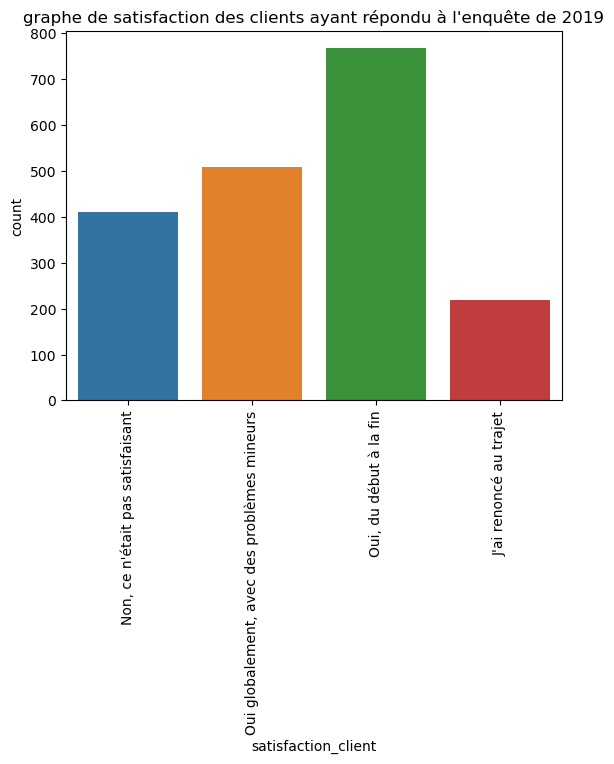

In [ ]:
sns.countplot(x=df_velo['satisfaction_client'])
plt.title("graphe de satisfaction des clients ayant répondu à l'enquête de 2019")
plt.xticks(rotation=90)

In [ ]:
df_velo.groupby(["satisfaction_client", "Problème sur le dépôt du Vélib' (je n'ai pas réussi à déposer mon vélo du premier coup) :"]).agg({"Problème sur le dépôt du Vélib' (je n'ai pas réussi à déposer mon vélo du premier coup) :" :'count'})

Problème sur le dépôt du Vélib' (je n'ai pas réussi à déposer mon vélo du premier coup) :
satisfaction_client                         Problème sur le dépôt du Vélib' (je n'ai pas ré...                                                                                           
J'ai renoncé au trajet                      Non                                                                                               115                                        
                                            Oui                                                                                                 8                                        
Non, ce n'était pas satisfaisant            Non                                                                                               288                                        
                                            Oui                                                                                                52                                        
Oui globalement, avec des problèmes mineurs Non                                                                                               379                                        
                                            Oui                                                                                                56                                        
Oui, du début à la fin                      Non                                                                                               320                                        
                                            Oui                                                                                                 8

In [ ]:
df_velo.groupby(["satisfaction_client", "Problème sur le Vélib' lui-même :"]).agg({"Problème sur le Vélib' lui-même :" :'count'})

Problème sur le Vélib' lui-même :
satisfaction_client                         Problème sur le Vélib' lui-même :                                   
J'ai renoncé au trajet                      Non                                                               69
                                            Oui                                                               54
Non, ce n'était pas satisfaisant            Non                                                               69
                                            Oui                                                              271
Oui globalement, avec des problèmes mineurs Non                                                              182
                                            Oui                                                              253
Oui, du début à la fin                      Non                                                              300
                                            Oui                                                               28

In [ ]:
df_velo.groupby(["satisfaction_client", "Problème sur la prise du Vélib' (je n'ai pas réussi à prendre un vélo du premier coup) :"]).agg({"Problème sur la prise du Vélib' (je n'ai pas réussi à prendre un vélo du premier coup) :" :'count'})

Problème sur la prise du Vélib' (je n'ai pas réussi à prendre un vélo du premier coup) :
satisfaction_client                         Problème sur la prise du Vélib' (je n'ai pas ré...                                                                                          
J'ai renoncé au trajet                      Non                                                                                                27                                       
                                            Oui                                                                                                96                                       
Non, ce n'était pas satisfaisant            Non                                                                                                97                                       
                                            Oui                                                                                               243                                       
Oui globalement, avec des problèmes mineurs Non                                                                                               201                                       
                                            Oui                                                                                               234                                       
Oui, du début à la fin                      Non                                                                                               292                                       
                                            Oui                                                                                                36

In [ ]:
df_velo.describe()

,Nombre de Vélib' essayés (facultatif) :,Numéro de station de départ (facultatif) :,Numéro de station d'arrivée (facultatif) :
count,516.000000,412.000000,393.000000
mean,3.594961,16053.228155,16529.412214
std,2.856553,12940.907206,10594.394603
min,1.000000,1003.000000,1.000000
25%,2.000000,9101.000000,11019.000000
50%,3.000000,13035.000000,13035.000000
75%,4.000000,20023.000000,20023.000000
max,37.000000,200223.000000,92006.000000


In [ ]:
# sauvegarde nouveau fichier
#----------------------------------------

import io
filename='vélos.csv'
df_velo.to_csv(filename, index=False)
#download = files.download(filename)
#print (filename, 'sauvegarde')